#1

(0) Classification decision tree is a supervised machine learning algorithm that predicts categorical outcomes by recursively splitting data based on feature values, with decisions represented as a tree structure of nodes and branches. 
(a) There are many real world applications of classification decision tree, for example, it can be used in healthcare to predict disease presence and identify risk level for complications based on medical history. 
(b) The major difference between classification decision tree and multiple linear regression is that they use different prediction approach to handle different types of problems. More specifically, classification decision tree can be used when the problem involves categorical variables, and multiple linear regression is used when the problem involves continuous variables. This is because they have different method when predicting, classification decision tree uses root node and decision node to classify data into different group to make predictions, consequently this requires the prediction outcome to be categorical and can only handle continuous data as classified categories, while multiple linear regession outputs continuous predicted value since it takes both continuous and categorical data as numerical inputs and uses a linear relationship to make predictions.

#2

(1) Accuracy can be an ideal metric when predicting the weather because most of the time errors in different weathers are equally problematic and suits the what accuracy measures -- the proportion of true results. 
(2) Sensitivity can be used in high risk situations because we would want to prioritize minimizing false negatives because the situation is sensitive to missing a positive case. For example, fire alarm systems and disease detection are situations that we do not want to miss a positive case because that false negatives might lead severe consequences such as wrong diagnosis, delayed treatment, and false alarms. 
(3) Specificity can be used when we want to prioritize minimizing false positives. For example, when detecting fraud in finance we do not want to falsely tag a transaction that is legitimate as a fraud because it would costs losts in customers. 
(4) Precision is also use when we want to prioritize minimizing false positives, but focusing on the actual negatives. For example, it is benificial to use precision to identify potential suspects and criminal activity because we want to minize wrong accusations and make sure that the suspect is actually related to a crime by having high precision.

#2 Summary
https://chatgpt.com/share/673fbeee-69b0-8001-9a11-2dca2bb92ac9
Here is a summary of our exchanges about Classification Decision Trees and evaluation metrics:

1. Classification Decision Tree Overview
Problem Addressed: Classification Decision Trees solve classification problems, where the goal is to predict a categorical output based on input features.
Real-World Applications:
Healthcare: Disease diagnosis (e.g., "Diabetes: Yes/No").
Marketing: Customer segmentation or predicting churn.
Finance: Fraud detection in transactions.
Education: Predicting student performance (e.g., "Pass/Fail").
2. Differences Between Classification Decision Tree and Multiple Linear Regression
Problem Type:
Decision Trees: Classification problems (categorical output).
Linear Regression: Regression problems (continuous output).
Prediction Approach:
Decision Trees: Use splits to form intuitive decision rules.
Linear Regression: Uses a linear equation with coefficients.
Input Handling:
Decision Trees: Work with both categorical and numerical features without scaling.
Linear Regression: Require numerical features, often scaled or normalized.
Real-World Applications:
Decision Trees: Disease diagnosis, spam detection.
Linear Regression: Predicting house prices or stock prices.
3. Real-World Applications for Evaluation Metrics
1. Accuracy: Measures overall correctness.

Example: Spam detection, weather forecasting.
2. Sensitivity (True Positive Rate): Focuses on identifying all actual positives (minimizing false negatives).

Example: Disease detection, fire alarm systems.
3. Specificity (True Negative Rate): Focuses on correctly identifying negatives (minimizing false positives).

Example: Fraud detection, drug testing.
4. Precision (Positive Predictive Value): Focuses on ensuring positive predictions are correct (minimizing false positives).

Example: Email marketing campaigns, medical screening for rare diseases.
4. Precision vs. Specificity
Precision:
Proportion of predicted positives that are correct.
Applications: Law enforcement, spam filtering, and rare disease screening.
Specificity:
Proportion of actual negatives correctly identified.
Applications: Fraud detection, fire alarms, and drug testing.
Key Difference:
Precision evaluates the quality of positive predictions, while specificity evaluates the accuracy of negative predictions.
This summary should provide a clear record of our discussion. Let me know if you'd like any additional details! 😊

In [2]:
#3

import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, recall_score, make_scorer
import graphviz as gv

url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")

columns_to_remove = ["Weight_oz", "Width", "Height"]
ab_reduced = ab.drop(columns=columns_to_remove, errors='ignore')
ab_reduced_noNaN = ab_reduced.dropna()

ab_reduced_noNaN.loc[:, 'Pub year'] = ab_reduced_noNaN['Pub year'].astype(int)
ab_reduced_noNaN.loc[:, 'NumPages'] = ab_reduced_noNaN['NumPages'].astype(int)
ab_reduced_noNaN.loc[:, 'Hard_or_Paper'] = ab_reduced_noNaN['Hard_or_Paper'].astype('category')

print("Cleaned Dataset Preview:")
print(ab_reduced_noNaN.head())
print("\nSummary Statistics:")
print(ab_reduced_noNaN.describe())
print("\nData Types:")
print(ab_reduced_noNaN.dtypes)
print("\nUnique values in 'Hard_or_Paper':")
print(ab_reduced_noNaN['Hard_or_Paper'].unique())

Cleaned Dataset Preview:
                                               Title           Author  \
0  1,001 Facts that Will Scare the S#*t Out of Yo...      Cary McNeal   
1  21: Bringing Down the House - Movie Tie-In: Th...      Ben Mezrich   
2       100 Best-Loved Poems (Dover Thrift Editions)            Smith   
3            1421: The Year China Discovered America    Gavin Menzies   
4    1493: Uncovering the New World Columbus Created  Charles C. Mann   

   List Price  Amazon Price Hard_or_Paper  NumPages           Publisher  \
0       12.95          5.18             P     304.0         Adams Media   
1       15.00         10.20             P     273.0          Free Press   
2        1.50          1.50             P      96.0  Dover Publications   
3       15.99         10.87             P     672.0    Harper Perennial   
4       30.50         16.77             P     720.0               Knopf   

   Pub year     ISBN-10  Thick  
0    2010.0  1605506249    0.8  
1    2008.0  141656

Number of observations in training set: 255
Number of observations in testing set: 64
Accuracy: 0.84


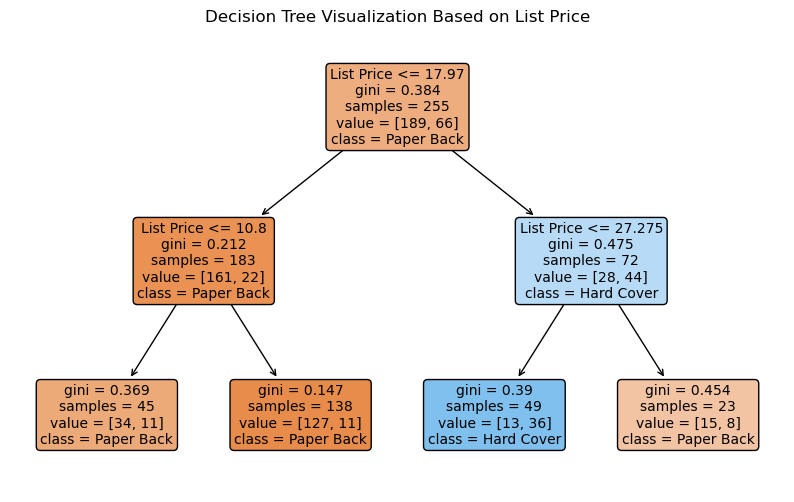

In [10]:
#4

url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")

columns_to_remove = ["Weight_oz", "Width", "Height"]
ab_reduced = ab.drop(columns=columns_to_remove, errors='ignore')
ab_reduced_noNaN = ab_reduced.dropna()

ab_reduced_noNaN.loc[:, 'Pub year'] = ab_reduced_noNaN['Pub year'].astype(int)
ab_reduced_noNaN.loc[:, 'NumPages'] = ab_reduced_noNaN['NumPages'].astype(int)
ab_reduced_noNaN.loc[:, 'Hard_or_Paper'] = ab_reduced_noNaN['Hard_or_Paper'].astype('category')

ab_reduced_noNaN_train, ab_reduced_noNaN_test = train_test_split(
    ab_reduced_noNaN, test_size=0.2, random_state=42
)

print("Number of observations in training set:", len(ab_reduced_noNaN_train))
print("Number of observations in testing set:", len(ab_reduced_noNaN_test))

y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']
X = ab_reduced_noNaN[['List Price']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=64/319, random_state=42)
clf = tree.DecisionTreeClassifier(max_depth=2, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")

dot_data = tree.export_graphviz(
    clf, out_file=None, feature_names=['List Price'], class_names=['Paper Back', 'Hard Cover'],
    filled=True, rounded=True, special_characters=True
)

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plot_tree(
    clf,
    feature_names=['List Price'],
    class_names=['Paper Back', 'Hard Cover'],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree Visualization Based on List Price")
plt.show()

#4 Summary
https://chatgpt.com/share/673fc629-2638-8001-b864-168fc580a097
Summary of Interactions:
Data Cleaning and Preprocessing:
You shared your code for cleaning and preprocessing a dataset from Amazon Books, which included dropping unnecessary columns (Weight_oz, Width, Height), removing rows with missing values, and converting columns to appropriate data types (Pub year, NumPages, Hard_or_Paper).
Explanation of Data Preparation Steps:
I explained the purpose of the following steps:
y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']: Encoded the categorical variable Hard_or_Paper into a binary variable where 1 represents a hard cover and 0 represents a paper back.
X = ab_reduced_noNaN[['List Price']]: Selected the List Price column as the feature for model training.
Training a Decision Tree Classifier:
I provided code to train a DecisionTreeClassifier using only the List Price variable to predict whether a book is hard cover or paper back. Key steps included:
Splitting the dataset into training (255 observations) and testing (64 observations) sets using train_test_split.
Training the model with max_depth=2 to prevent overfitting.
Calculating the model's accuracy on the testing set.
Visualizing the Decision Tree:
I explained how to visualize the decision tree using graphviz. The output was saved as classification_tree.png.
Upon your request for visualization using matplotlib, I provided an alternative method using plot_tree to display the decision tree inline within the Python environment.
Summary Creation:
You requested a summary of our exchanges for submission as part of your homework assignment, and I provided this detailed summary.
If you need further clarification or edits to the summary, let me know!

Accuracy for clf2: 0.86


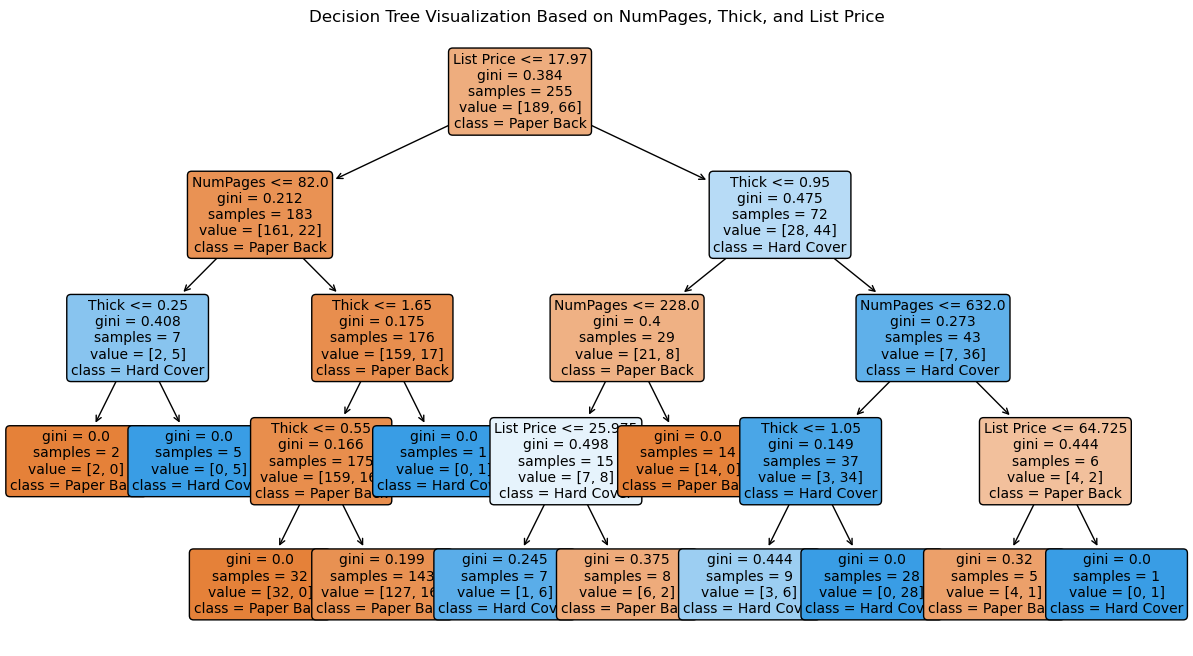

In [13]:
#5

url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")

columns_to_remove = ["Weight_oz", "Width", "Height"]
ab_reduced = ab.drop(columns=columns_to_remove, errors='ignore')
ab_reduced_noNaN = ab_reduced.dropna()

ab_reduced_noNaN.loc[:, 'Pub year'] = ab_reduced_noNaN['Pub year'].astype(int)
ab_reduced_noNaN.loc[:, 'NumPages'] = ab_reduced_noNaN['NumPages'].astype(int)
ab_reduced_noNaN.loc[:, 'Hard_or_Paper'] = ab_reduced_noNaN['Hard_or_Paper'].astype('category')

ab_reduced_noNaN_train, ab_reduced_noNaN_test = train_test_split(
    ab_reduced_noNaN, test_size=0.2, random_state=42
)

X = ab_reduced_noNaN[['NumPages', 'Thick', 'List Price']]
y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf2 = tree.DecisionTreeClassifier(max_depth=4, random_state=42)
clf2.fit(X_train, y_train)
y_pred = clf2.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy for clf2: {accuracy:.2f}")
plt.figure(figsize=(15, 8))
plot_tree(
    clf2,
    feature_names=['NumPages', 'Thick', 'List Price'],
    class_names=['Paper Back', 'Hard Cover'],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree Visualization Based on NumPages, Thick, and List Price")
plt.show()

In [19]:
#6

url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")

columns_to_remove = ["Weight_oz", "Width", "Height"]
ab_reduced = ab.drop(columns=columns_to_remove, errors='ignore')
ab_reduced_noNaN = ab_reduced.dropna()

ab_reduced_noNaN.loc[:, 'Pub year'] = ab_reduced_noNaN['Pub year'].astype(int)
ab_reduced_noNaN.loc[:, 'NumPages'] = ab_reduced_noNaN['NumPages'].astype(int)
ab_reduced_noNaN.loc[:, 'Hard_or_Paper'] = ab_reduced_noNaN['Hard_or_Paper'].astype('category')

X_clf = ab_reduced_noNaN[['List Price']]
y_clf = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']

X_clf2 = ab_reduced_noNaN[['NumPages', 'Thick', 'List Price']]

X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(
    X_clf, y_clf, test_size=64/319, random_state=42
)

X_train_clf2, X_test_clf2, y_train_clf2, y_test_clf2 = train_test_split(
    X_clf2, y_clf, test_size=0.2, random_state=42
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = tree.DecisionTreeClassifier(max_depth=2, random_state=42)
clf.fit(X_train_clf, y_train_clf)

clf2 = tree.DecisionTreeClassifier(max_depth=4, random_state=42)
clf2.fit(X_train_clf2, y_train_clf2)

y_pred_clf = clf.predict(X_test_clf)
y_pred_clf2 = clf2.predict(X_test_clf2)

cm_clf = confusion_matrix(y_test_clf, y_pred_clf)
cm_clf2 = confusion_matrix(y_test_clf2, y_pred_clf2)

def calculate_metrics(cm):
    tn, fp, fn, tp = cm.ravel()
    sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    accuracy = (tp + tn) / cm.sum()
    return np.round(sensitivity, 3), np.round(specificity, 3), np.round(accuracy, 3)

metrics_clf = calculate_metrics(cm_clf)
metrics_clf2 = calculate_metrics(cm_clf2)

print(f"Metrics for clf (List Price Only):")
print(f"  Sensitivity: {metrics_clf[0]}")
print(f"  Specificity: {metrics_clf[1]}")
print(f"  Accuracy: {metrics_clf[2]}")

print(f"Metrics for clf2 (Multiple Features):")
print(f"  Sensitivity: {metrics_clf2[0]}")
print(f"  Specificity: {metrics_clf2[1]}")
print(f"  Accuracy: {metrics_clf2[2]}")

Metrics for clf (List Price Only):
  Sensitivity: 0.7
  Specificity: 0.909
  Accuracy: 0.844
Metrics for clf2 (Multiple Features):
  Sensitivity: 0.75
  Specificity: 0.909
  Accuracy: 0.859


#6 Summary
https://chatgpt.com/share/673fc629-2638-8001-b864-168fc580a097
Summary of Interactions
Confusion Matrix Visualization and Interpretation:
You asked about how to create and interpret confusion matrices, including how to format them with three significant digits. I provided code examples to:
Generate confusion matrices using sklearn's confusion_matrix function.
Visualize confusion matrices with matplotlib and annotate them with rounded values using np.round().
Explanation of Positive and Negative Classes:
We discussed the definitions of "positive" and "negative" in binary classification.
For your dataset:
Positive class (1): Hard cover books.
Negative class (0): Paper back books.
I explained how these definitions relate to True Positives (TP), True Negatives (TN), False Positives (FP), and False Negatives (FN).
Conditions Leading to TP, TN, FP, and FN:
I detailed the factors that cause each type of classification outcome:
TP and TN: Model correctly identifies patterns specific to each class.
FP and FN: Overlapping features, noise, insufficient model complexity, or suboptimal thresholds.
Practical tips were shared to reduce FP and FN, such as better feature engineering and threshold adjustments.
Order of y_true and y_pred in confusion_matrix:
You asked which parameter comes first in the confusion_matrix function.
I clarified that y_true (actual values) comes first, followed by y_pred (predicted values). Reversing them leads to an incorrect confusion matrix.
Let me know if there’s anything else you’d like included in the summary!

#7

The differences between the two confusion matrices is that they use different features to make predictions. The first confusion matrix only uses List Price as the input feature, which might not provide enough information to make accurate predictions, while the second confusion matrix incorporates NumPages, Thick, and List Price, which allows the model to utilize more data points and patterns for better predictions.
The confusion matrices for clf and clf2 are better because they are evaluated on unseen test data, which measures how well the models generalize beyond the training dataset. Furthermore, this approach avoids overly optimistic results that can occur when evaluating directly on training data.

#7 Summary
https://chatgpt.com/share/673fc629-2638-8001-b864-168fc580a097
Summary of Interactions
Reading an sklearn Confusion Matrix:
You asked about the order of parameters in the confusion_matrix function.
I clarified that y_true (actual values) comes first, followed by y_pred (predicted values). Reversing them would result in an incorrect matrix.
I provided an example of a confusion matrix, explained its structure, and showed how it organizes outcomes into True Positives (TP), True Negatives (TN), False Positives (FP), and False Negatives (FN).
Causes of TP, TN, FP, and FN:
We discussed what leads to each classification outcome:
TP and TN: Occur when the model correctly identifies patterns for the positive and negative classes.
FP and FN: Arise due to overlapping features, insufficient data, noise, or poorly tuned thresholds.
Practical strategies were provided to reduce FP and FN, including better feature engineering, threshold adjustments, and increasing model complexity.
Comparing Confusion Matrices for Two Models:
You asked about differences between confusion matrices computed for:
A decision tree (clf) trained on List Price alone.
A decision tree (clf2) trained on List Price, NumPages, and Thick.
I explained that:
Matrix 1 (List Price Only) reflects limitations in distinguishing classes when only one feature is used.
Matrix 2 (Multiple Features) leverages richer information, likely improving accuracy and reducing errors (FP, FN).
Differences in confusion matrices arise from the number and quality of features used in the model.
Why Confusion Matrices for clf and clf2 (Above) Are Better:
We discussed why confusion matrices computed on the test set are more reliable:
They evaluate the model’s ability to generalize to unseen data, avoiding overfitting.
Confusion matrices computed on the training set may give overly optimistic results due to data leakage or memorization.
I emphasized that performance metrics should always be based on test data for meaningful comparisons.
Let me know if there’s anything else you’d like included in this summary!

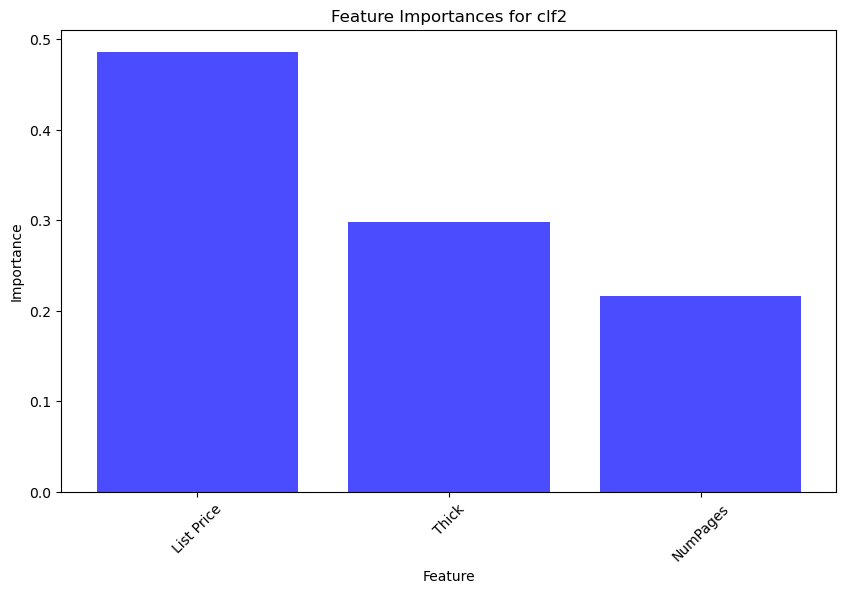

The most important predictor variable for clf2 is: List Price


In [21]:
#8

import matplotlib.pyplot as plt

feature_importances = clf2.feature_importances_
feature_names = clf2.feature_names_in_

sorted_indices = np.argsort(feature_importances)[::-1]
sorted_importances = feature_importances[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

plt.figure(figsize=(10, 6))
plt.bar(sorted_feature_names, sorted_importances, color='blue', alpha=0.7)
plt.title("Feature Importances for clf2")
plt.ylabel("Importance")
plt.xlabel("Feature")
plt.xticks(rotation=45)
plt.show()

most_important_feature = sorted_feature_names[0]
print(f"The most important predictor variable for clf2 is: {most_important_feature}")

#8 Summary
https://chatgpt.com/share/673fc629-2638-8001-b864-168fc580a097
Summary of Interactions
Classification Decision Tree Feature Importances:
You asked about the .feature_importances_ attribute in scikit-learn's classification decision trees and how to visualize and interpret it.
I explained that .feature_importances_ provides a measure of the relative contribution of each feature to the overall explanatory power of the model.
The methodology involves tracking improvements in the splitting criterion (e.g., Gini impurity or Shannon entropy) at each decision node.
Complexity of Decision Trees Compared to Linear Regression:
We discussed the complexity of understanding feature interactions in decision trees compared to the simplicity of multiple linear regression.
Feature importance heuristics help identify the relative importance of features, even in complex models.
Overfitting in Decision Trees:
I highlighted the risk of overfitting in decision trees and the importance of model complexity control.
We noted that methods like GridSearchCV can help optimize hyperparameters like max_depth to balance model complexity and generalization.
Visualization of Feature Importances for clf2:
I provided Python code to:
Extract feature importances from .feature_importances_.
Sort and visualize these importances using a bar chart.
Use .feature_names_in_ to associate feature importances with their corresponding names.
The visualization ranks the features (NumPages, Thick, and List Price) by importance, and the most important predictor is identified.
Example Output:
I outlined how to interpret the feature importance bar chart and print the most important predictor variable.
Let me know if there’s anything else to add to this summary!

#9

Coefficients in linear model regression reflects the influence on the predicted value y by every individual factor. In decision tree, the predictors are classified into categories through hierarchical splits. As a result, linear regression models output simple equation with coefficients that can be directly interpret, while decision tree outputs a representation of feature importance ranking.

#9 Summary
https://chatgpt.com/share/673fc629-2638-8001-b864-168fc580a097
Summary of Interactions
Feature Importances in Decision Trees:
You inquired about the methodology behind feature importances in decision trees.
I explained how decision trees calculate feature importances by summing the improvements in the splitting criterion (e.g., Gini impurity or Shannon entropy) caused by splits on each feature across the entire tree.
This allows us to understand the relative contributions of each feature to the model’s predictive performance.
Visualization of Feature Importances:
I provided Python code to visualize feature importances for clf2 using a bar chart, ranking features by their importance in descending order.
The code also identified and reported the most important predictor variable based on .feature_importances_ and .feature_names_in_.
Comparison of Interpreting Coefficients in Linear Regression vs. Feature Importances in Decision Trees:
I detailed the differences in interpreting predictors between the two models:
Linear Regression:
Coefficients indicate the magnitude and direction of a feature’s independent contribution to the target.
Assumes linearity and no strong interactions unless explicitly modeled.
Decision Trees:
Feature importance is a heuristic that measures the relative contribution of a feature to the overall model.
Automatically captures non-linear relationships and interactions.
A side-by-side comparison table was provided to highlight differences in assumptions, interpretation, and practical use cases.
When to Use Each Model:
I summarized practical situations where linear regression or decision trees would be preferred:
Linear Regression: For simple, linear relationships where interpretability of coefficients is key.
Decision Trees: For complex, non-linear relationships or when ranking feature importance is more critical than direct interpretability.
Let me know if there’s anything else you’d like included in this summary!

#10

Yes.